In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
df.shape

(200, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [59]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<ipython-input-60-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

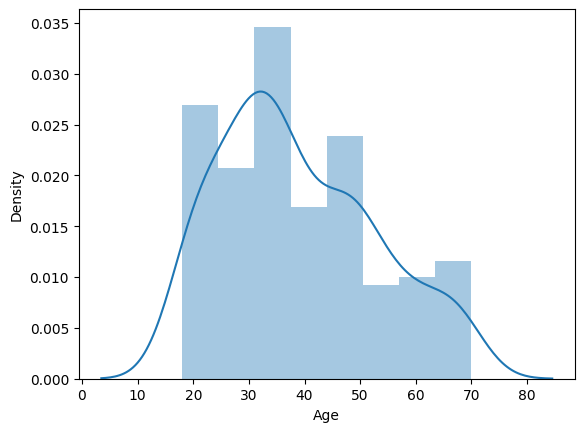

In [60]:
sns.distplot(df.Age)

<Axes: xlabel='Age', ylabel='CustomerID'>

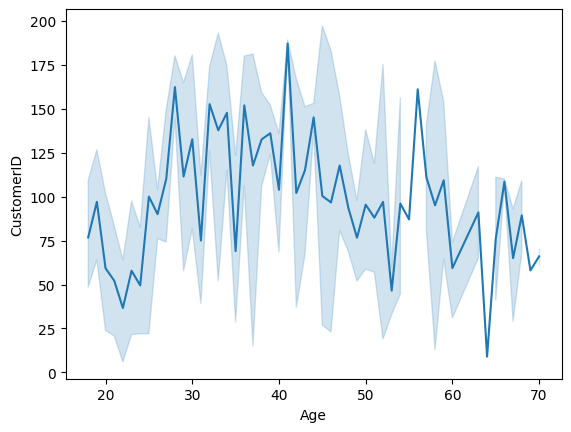

In [61]:
sns.lineplot(x=df.Age,y=df.CustomerID)

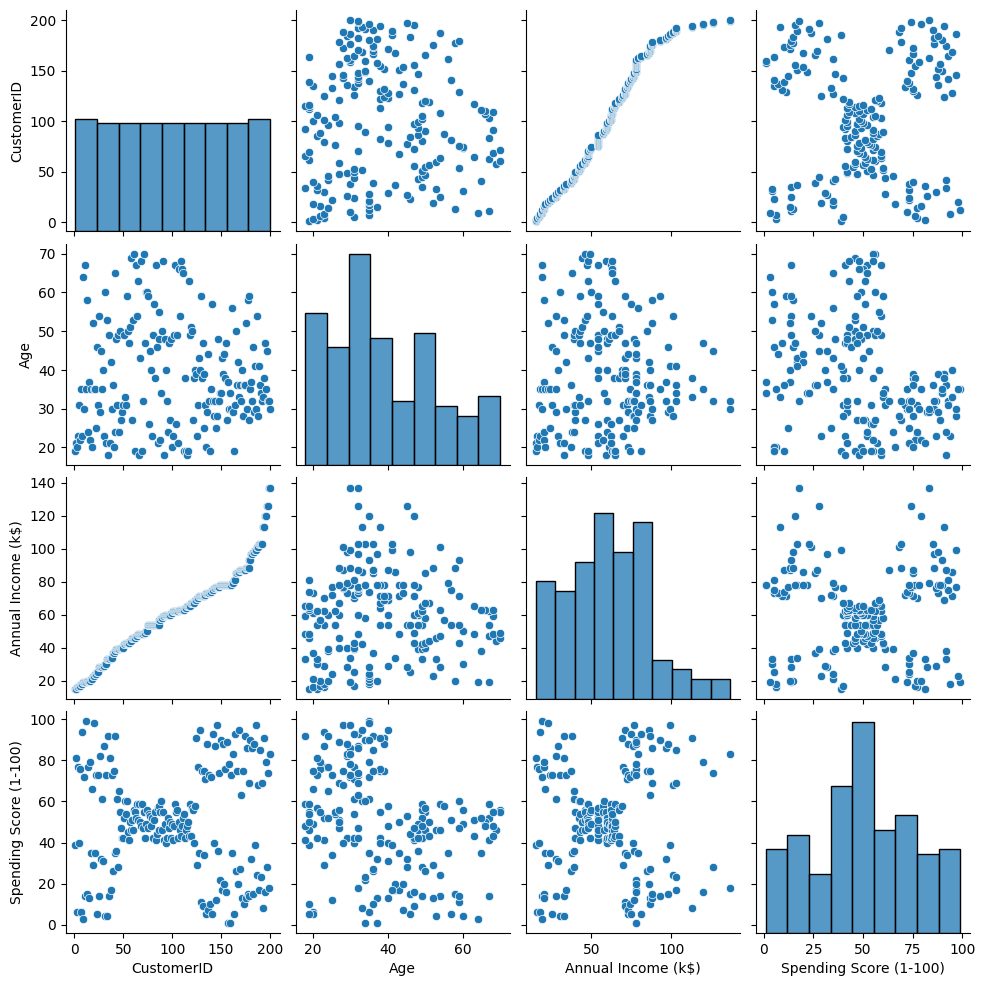

In [62]:
sns.pairplot(df)

<Axes: ylabel='Spending Score (1-100)'>

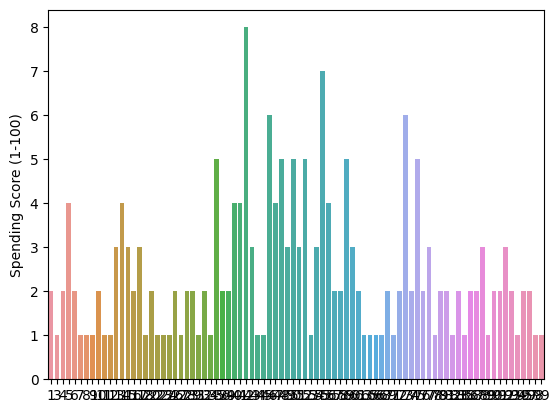

In [63]:
# bar plot
sns.barplot(x =df['Spending Score (1-100)'].value_counts().index,y =df['Spending Score (1-100)'].value_counts() )

<ipython-input-64-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

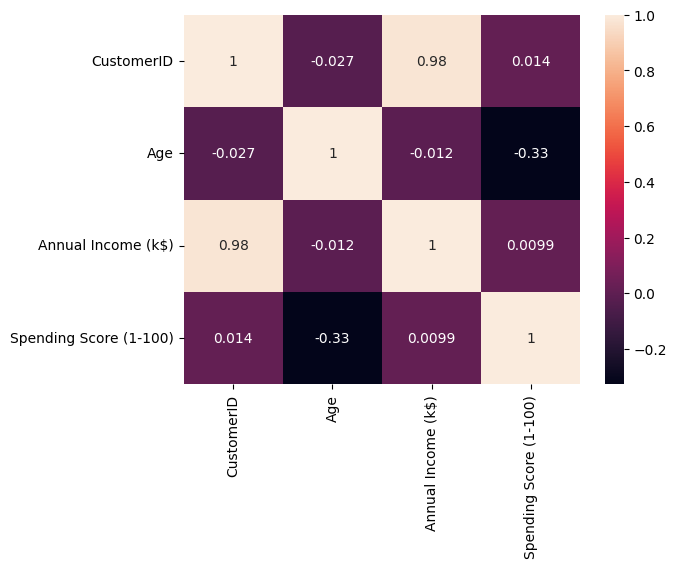

In [64]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

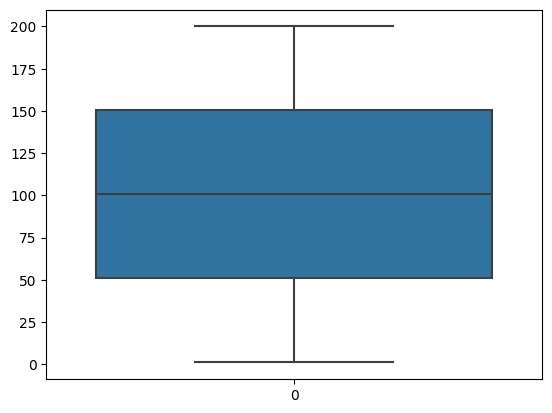

In [65]:
sns.boxplot(df.CustomerID)

<Axes: >

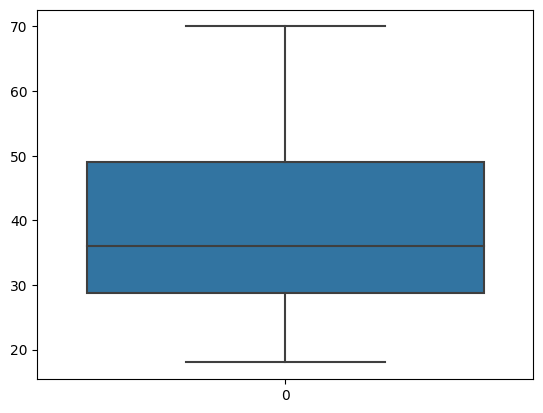

In [66]:
sns.boxplot(df.Age)

<Axes: >

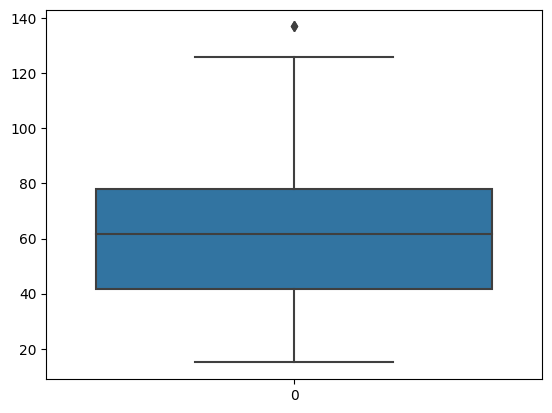

In [67]:
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

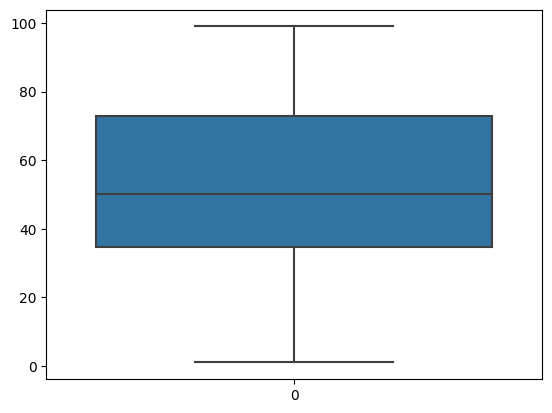

In [68]:
sns.boxplot(df['Spending Score (1-100)'])

In [69]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)

In [70]:
iqr=q3-q1

In [71]:
lower_limit=q1-1.5*iqr
lower_limit

-13.25

In [72]:
upper_limit=q3+1.5*iqr
upper_limit

132.75

In [73]:
df.median()

<ipython-input-73-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [74]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,61.5,df['Annual Income (k$)'])

<Axes: >

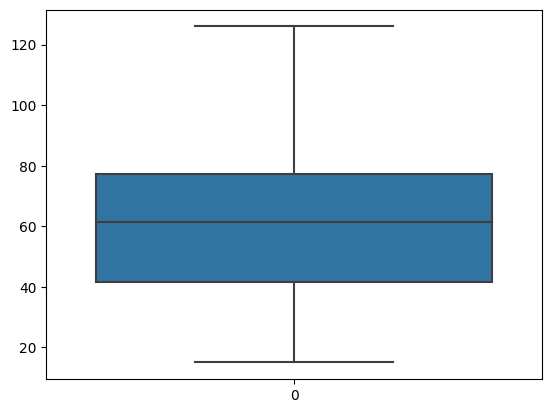

In [75]:
sns.boxplot(df['Annual Income (k$)'])

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [77]:
df.Gender=le.fit_transform(df.Gender)

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [79]:
x=df.iloc[:,:-1]

In [80]:
y=df.iloc[:,-1]

In [81]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [83]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [84]:
from sklearn import cluster

In [85]:
error=[]

In [86]:
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(x)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [87]:
error

[831009.6750000002,
 248745.41899189912,
 135238.0624423963,
 94523.42731049322,
 73729.87228029422,
 63250.9915705841,
 53926.90850558296,
 46252.6478120446,
 41110.509208234784,
 36366.07075777679]

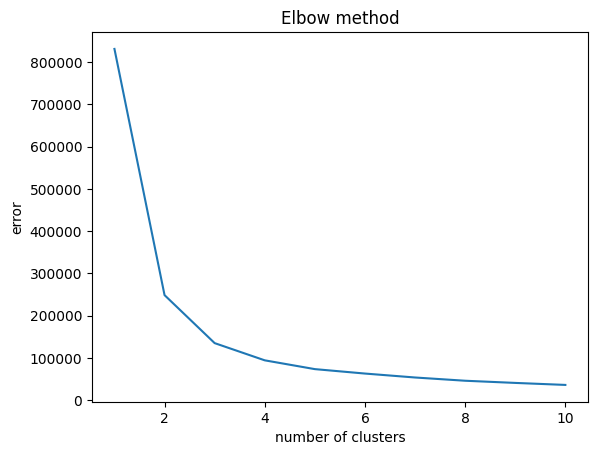

In [88]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [89]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)


In [90]:
km_model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [91]:
pred = km_model.predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [92]:
# Test the model with random observation

km_model.predict([[1.1,2.2,4.3,4.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [94]:
km_model.predict([[0,22,20,89]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [102]:
km_model.predict([[100,104,150,160]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)